# Compute performance metrics for the given Y and Y_score without sklearn

In [10]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [12]:
def comp_precision(tp, fp):
    return ((tp)/ float( tp + fp))*100

In [13]:
def comp_recall(tp, fn):
    return (tp  * 100)/ float( tp + fn)

In [114]:
def comp_f1_score(y_true, y_pred,tp, tn, fp, fn):
    precision = comp_precision(tp, fp)/100
    recall = comp_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [25]:
def comp_accuracy(tp, tn, fn, fp):
    return ((tp + tn) / float( tp + tn + fn + fp))

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [107]:
df1=pd.read_csv('5_a.csv')

In [108]:
df1['y_pred'] = (df1.y >= 0.5).astype('int')
df1.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [116]:
t=0.5
tp = np.logical_and( df1.proba > t, df1.y==1 ).sum()
tn = np.logical_and( df1.proba <=t, df1.y==0 ).sum()
fp = np.logical_and( df1.proba > t, df1.y==0 ).sum()
fn = np.logical_and( df1.proba <=t, df1.y==1 ).sum()

print('tp',tp)
print('tn',tn)
print('fp',fp)
print('fn',fn)

#tp, tn, fp, fn

tp 10000
tn 0
fp 100
fn 0


In [117]:
print('F1_score',comp_f1_score(df1.y, df1.y_pred,tp, tn, fp, fn))

F1_score 0.9950248756218906


In [118]:
Accuracy=comp_accuracy(tp, tn, fn, fp)
print('Accuracy',Accuracy)

Accuracy 0.9900990099009901


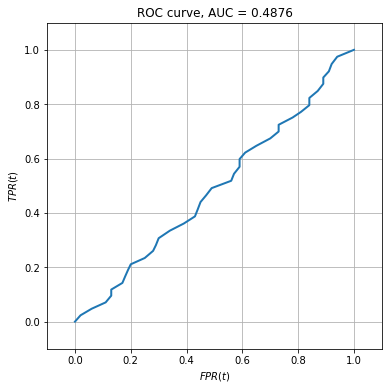

In [156]:
##Reference :https://notmatthancock.github.io
thresholds = np.arange(0.0, 1.01, .01)
ROC = np.zeros((101,2))

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( df1.proba > t, df1.y==1 ).sum()
    TN_t = np.logical_and( df1.proba <=t, df1.y==0 ).sum()
    FP_t = np.logical_and( df1.proba > t, df1.y==0 ).sum()
    FN_t = np.logical_and( df1.proba <=t, df1.y==1 ).sum()

    # Compute false positive rate for current threshold.
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t
    # Compute true  positive rate for current threshold.
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t
    
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

AUC = 0.
for i in range(100):
    AUC += (ROC[i,0]-ROC[i+1,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5

plt.title('ROC curve, AUC = %.4f'%AUC)
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [94]:
df2=pd.read_csv('5_b.csv')

In [124]:
df2['y_pred'] = (df2.y >= 0.5).astype('float')
# df2

In [125]:
t=0.5
tp = np.logical_and( df2.proba > t, df2.y==1 ).sum()
tn = np.logical_and( df2.proba <=t, df2.y==0 ).sum()
fp = np.logical_and( df2.proba > t, df2.y==0 ).sum()
fn = np.logical_and( df2.proba <=t, df2.y==1 ).sum()

print('tp',tp)
print('tn',tn)
print('fp',fp)
print('fn',fn)

# tp, tn, fp, fn

tp 55
tn 9761
fp 239
fn 45


In [121]:
print('F1_score',comp_f1_score(df2.y, df2.y_pred,tp, tn, fp, fn))

F1_score 0.2791878172588833


In [122]:
Accuracy=comp_accuracy(tp, tn, fn, fp)
print('Accuracy',Accuracy)

Accuracy 0.9718811881188119


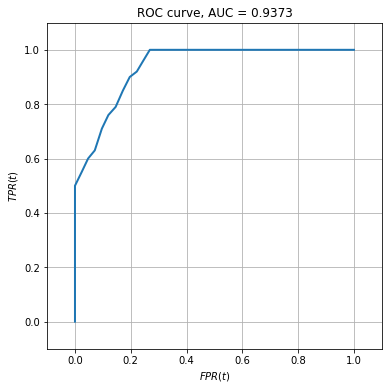

In [123]:
#Reference :https://notmatthancock.github.io
thresholds = np.arange(0.0, 1.01, .01)
ROC = np.zeros((101,2))

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( df2.proba > t, df2.y==1 ).sum()
    TN_t = np.logical_and( df2.proba <=t, df2.y==0 ).sum()
    FP_t = np.logical_and( df2.proba > t, df2.y==0 ).sum()
    FN_t = np.logical_and( df2.proba <=t, df2.y==1 ).sum()

    # Compute false positive rate for current threshold.
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t
    # Compute true  positive rate for current threshold.
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t
    
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

AUC = 0.
for i in range(100):
    AUC += (ROC[i,0]-ROC[i+1,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5

plt.title('ROC curve, AUC = %.4f'%AUC)
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [127]:
df3=pd.read_csv('5_c.csv')

In [136]:
# df3

In [144]:
thresholds = np.linspace(1,0,101)

Dic = {}

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( df3.prob > t, df3.y==1 ).sum()
    TN_t = np.logical_and( df3.prob <=t, df3.y==0 ).sum()
    FP_t = np.logical_and( df3.prob > t, df3.y==0 ).sum()
    FN_t = np.logical_and( df3.prob <=t, df3.y==1 ).sum()

    𝐴=(500 * FN_t) + (100 * FP_t)
    Dic[thresholds[i]] = A


In [146]:
Dic

In [147]:
Dic_sort=sorted(Dic, key=Dic.get)

In [149]:
print("the threshold value is ",Dic_sort[0])

the threshold value is  0.22999999999999998


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [36]:
df4=pd.read_csv('5_d.csv')

In [37]:
df4.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [38]:
add = 0  
n = df4.shape[0]
for i in range (0,n):  
    difference = df4['y'][i] - df4['pred'][i]  
    squared_difference = difference**2  
    add+= squared_difference  
MSE = add/n
print('MSE : ',MSE)

MSE :  177.16569974554707


In [39]:
MSE = np.square(np.subtract(df4['y'].to_numpy(),df4['pred'].to_numpy())).mean() 
#Geeksforgeeks --> reference
MSE

177.16569974554707

In [40]:
# R - square
mean_y=df4.y.mean()
SSt=((df4.y-mean_y)**2).sum()
SSe=((df4.y-df4.pred)**2).sum()
R_squared=1-(SSe/SSt)
print('R-Square : ',R_squared)


R-Square :  0.9563582786990937


In [41]:
div=df4.y.sum()
err=abs(df4.y-df4.pred).sum()

MAPE=err/div
print('MAPE : ',MAPE*100,'%')

MAPE :  12.91202994009687 %
